## **NAME: Neha Ganeshe**

# **TASK 3- Perform exploratory data analysis on sample superstore data**

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv('/content/SampleSuperstore.csv')
df.head()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Ship Mode     9994 non-null   object 
 1   Segment       9994 non-null   object 
 2   Country       9994 non-null   object 
 3   City          9994 non-null   object 
 4   State         9994 non-null   object 
 5   Postal Code   9994 non-null   int64  
 6   Region        9994 non-null   object 
 7   Category      9994 non-null   object 
 8   Sub-Category  9994 non-null   object 
 9   Sales         9994 non-null   float64
 10  Quantity      9994 non-null   int64  
 11  Discount      9994 non-null   float64
 12  Profit        9994 non-null   float64
dtypes: float64(3), int64(2), object(8)
memory usage: 1015.1+ KB


In [4]:
df.describe()

,Postal Code,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,55190.379428,229.858001,3.789574,0.156203,28.656896
std,32063.693350,623.245101,2.225110,0.206452,234.260108
min,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,23223.000000,17.280000,2.000000,0.000000,1.728750
50%,56430.500000,54.490000,3.000000,0.200000,8.666500
75%,90008.000000,209.940000,5.000000,0.200000,29.364000
max,99301.000000,22638.480000,14.000000,0.800000,8399.976000


Visualizing correlation matrix

In [5]:
corr_mat = df.corr()
corr_mat

,Postal Code,Sales,Quantity,Discount,Profit
Postal Code,1.000000,-0.023854,0.012761,0.058443,-0.029961
Sales,-0.023854,1.000000,0.200795,-0.028190,0.479064
Quantity,0.012761,0.200795,1.000000,0.008623,0.066253
Discount,0.058443,-0.028190,0.008623,1.000000,-0.219487
Profit,-0.029961,0.479064,0.066253,-0.219487,1.000000


In [6]:
plt.rcParams['figure.figsize'] = (15,6)

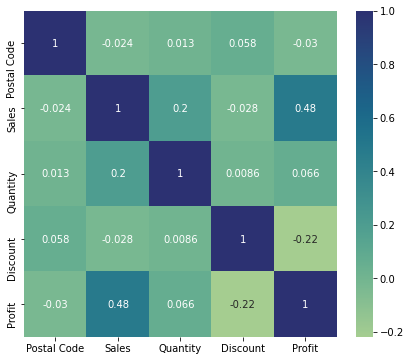

In [7]:
plt.figure(figsize=(7,6))
sns.heatmap(corr_mat, cmap='crest', annot=True)

Superstore category visualization

Text(0.5, 1.0, 'Supestore Categories')

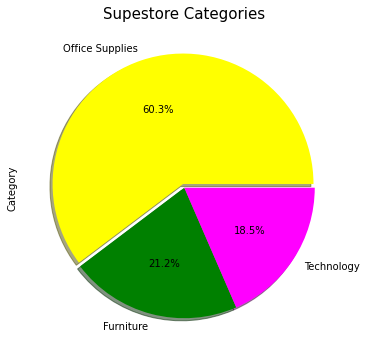

In [8]:
plt.figure(figsize=(15,6))
cat = df['Category'].value_counts()

cmap = plt.get_cmap('Spectral')
colors = ['yellow', 'green', 'magenta']
cat.plot.pie(autopct="%1.1f%%", shadow = True, colors=colors, explode = (0.03,0,0))
plt.title('Supestore Categories', fontsize=15)

This pie chart represents that the store has more office supplies than the furniture and technology

**Visualizing sub-category**

In [9]:
df['Sub-Category'].unique()


array(['Bookcases', 'Chairs', 'Labels', 'Tables', 'Storage',
       'Furnishings', 'Art', 'Phones', 'Binders', 'Appliances', 'Paper',
       'Accessories', 'Envelopes', 'Fasteners', 'Supplies', 'Machines',
       'Copiers'], dtype=object)

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


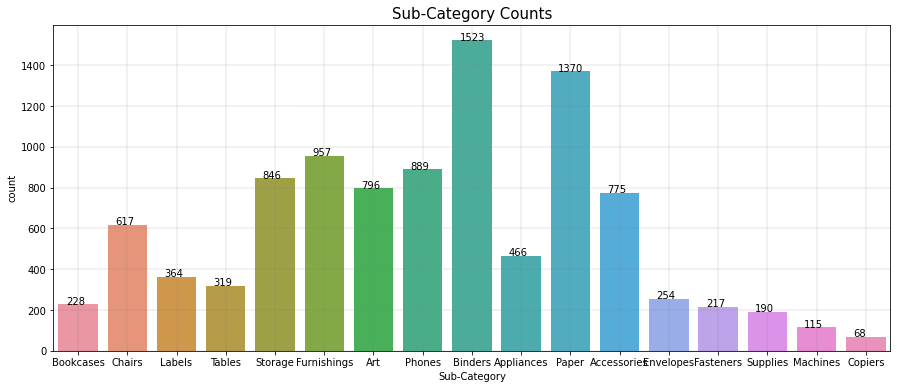

In [10]:
fig = plt.figure(figsize=(15,6))
axes = fig.add_subplot(111)
s = sns.countplot('Sub-Category', data = df)
for s in axes.patches:
  axes.annotate('{:.0f}'.format(s.get_height()), (s.get_x()+0.15, s.get_height()+1))

plt.grid(color='gray', linestyle='--', linewidth=0.3)
plt.title('Sub-Category Counts', fontsize=15)
plt.show()

Text(0.5, 1.0, 'Superstore Sub-Category products')

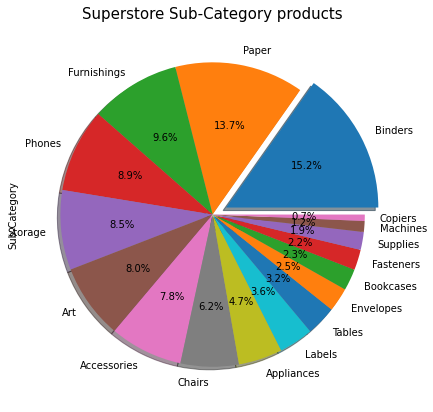

In [11]:
plt.figure(figsize=(15,7))
sub_cat = df['Sub-Category'].value_counts()
theme = plt.get_cmap('hsv')
sub_cat.plot.pie(autopct= "%1.1f%%", shadow=True, explode=(0.1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0))
plt.title('Superstore Sub-Category products', fontsize=15)

This graph shows that the store has a wide variety of office supplies specially in Binders and Paper department.

**Visualization of total sales and profit by Sub-category**

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


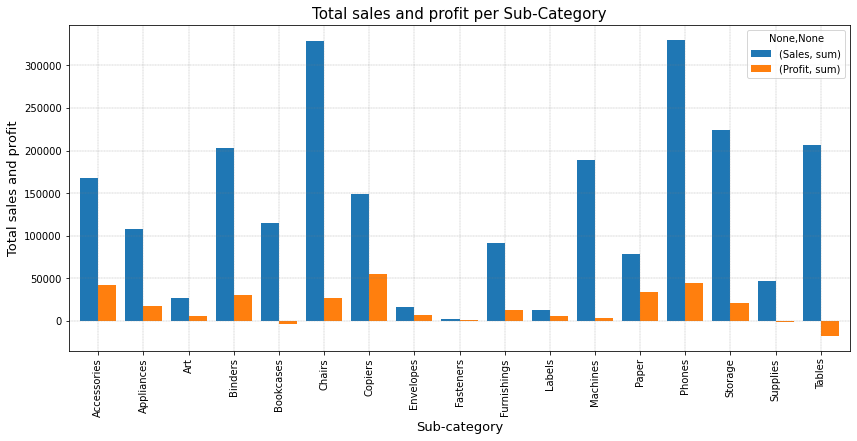

In [12]:
sale_profit_sum = df.groupby('Sub-Category')['Sales', 'Profit'].agg(['sum'])
sale_profit_sum.plot.bar(width=0.8, figsize=(14,6))
plt.title('Total sales and profit per Sub-Category', fontsize=15)
plt.xlabel("Sub-category", fontsize=13)
plt.ylabel("Total sales and profit", fontsize=13)
plt.grid(color='gray', linestyle='--', linewidth=0.3)

From this graph, we can tell that highest profit is earned in Copiers and highest selling price is of phones and chairs as compared to others.
We call also tell that tables, bookcases and supplies department are in a loss despite their average sales.

**Visualizing how much the products are distributed region wise**

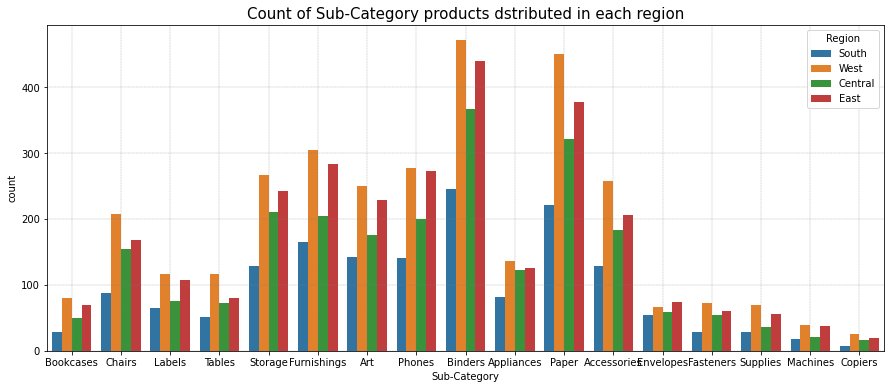

In [13]:
sns.countplot(data= df, x='Sub-Category', hue='Region')
plt.title('Count of Sub-Category products dstributed in each region', fontsize=15)
plt.grid(color='gray', linestyle='--', linewidth=0.3)

From this plot, we can tell that people from west and east buys the most from the superstore. People from the south, on the other hand buys the least.

**Finding the cost**

In [14]:
# adding one more column 'Cost' in the existing dataset
df['Cost']= df['Sales'] - df['Profit']
print(df.head())

        Ship Mode    Segment        Country  ... Discount    Profit       Cost
0    Second Class   Consumer  United States  ...     0.00   41.9136   220.0464
1    Second Class   Consumer  United States  ...     0.00  219.5820   512.3580
2    Second Class  Corporate  United States  ...     0.00    6.8714     7.7486
3  Standard Class   Consumer  United States  ...     0.45 -383.0310  1340.6085
4  Standard Class   Consumer  United States  ...     0.20    2.5164    19.8516

[5 rows x 14 columns]


Cost visualization

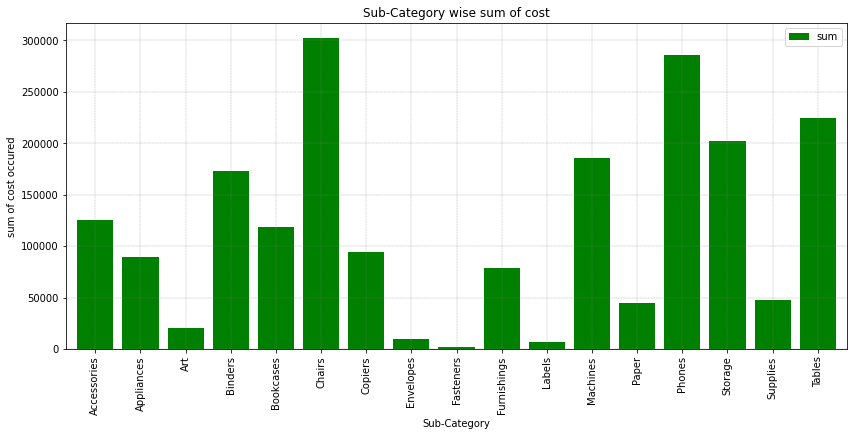

In [18]:
cost_occured = df.groupby('Sub-Category')['Cost'].agg(['sum'])
cost_occured.plot.bar(width=0.8, figsize=(14,6), color='green')
plt.title('Sub-Category wise sum of cost')
plt.ylabel('sum of cost occured')
plt.grid(color='gray', linestyle='--', linewidth=0.3)
plt.show()

From the above plot, we can say that retailers spend the most on chairs and the least on fasteners.

**Visualizing total sales by sub-category**

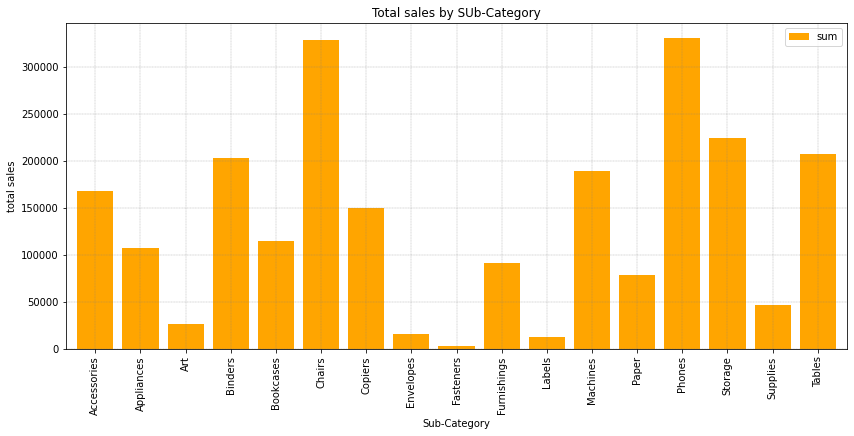

In [19]:
sub_cat_sales = df.groupby('Sub-Category')['Sales'].agg(['sum'])
sub_cat_sales.plot.bar(width=0.8, figsize=(14,6), color='orange')
plt.title("Total sales by SUb-Category")
plt.ylabel('total sales')
plt.grid(color='gray', linestyle='--', linewidth=0.3)
plt.show()

The graph shows the highest sales is in Phones and Chairs therefore most people buy these two item from the store.

**Finding profit %**

In [20]:
df['Profit %']= (df['Profit']/df['Cost'])*100
# profit percentage of first 5 product names
df.iloc[[0,1,2,3,4], [8,14]]

,Sub-Category,Profit %
0,Bookcases,19.047619
1,Chairs,42.857143
2,Labels,88.679245
3,Tables,-28.571429
4,Storage,12.676056


**Identifying which sub-category makes more profit**

In [21]:
# Products with hig profit percentage
df.sort_values(['Profit %', 'Sub-Category'], ascending=False).groupby('Profit %').head(10)

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit,Cost,Profit %
1696,Second Class,Home Office,United States,Bayonne,New Jersey,7002,East,Technology,Phones,104.980,2,0.0,52.4900,52.4900,100.000000
2592,Second Class,Corporate,United States,Summerville,South Carolina,29483,South,Technology,Phones,79.100,2,0.0,39.5500,39.5500,100.000000
6338,Standard Class,Corporate,United States,New York City,New York,10035,East,Technology,Phones,87.800,4,0.0,43.9000,43.9000,100.000000
246,Second Class,Home Office,United States,Lakeville,Minnesota,55044,Central,Office Supplies,Paper,47.880,6,0.0,23.9400,23.9400,100.000000
381,First Class,Corporate,United States,San Francisco,California,94109,West,Office Supplies,Paper,50.960,7,0.0,25.4800,25.4800,100.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8916,Standard Class,Corporate,United States,Austin,Texas,78745,Central,Office Supplies,Appliances,48.784,4,0.8,-131.7168,180.5008,-72.972973
8766,Standard Class,Corporate,United States,Fort Worth,Texas,76106,Central,Office Supplies,Appliances,24.588,3,0.8,-67.6170,92.2050,-73.333333
9164,Standard Class,Consumer,United States,Chicago,Illinois,60610,Central,Office Supplies,Appliances,143.128,2,0.8,-393.6020,536.7300,-73.333333
261,Standard Class,Corporate,United States,Pasadena,Texas,77506,Central,Office Supplies,Appliances,1.624,2,0.8,-4.4660,6.0900,-73.333333


**Count of segmentation**

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


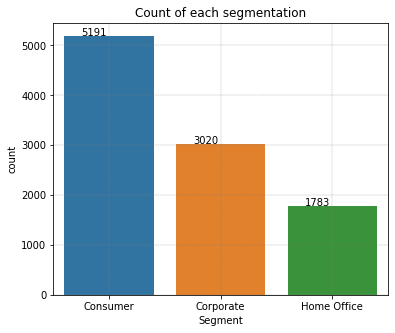

In [24]:
fig = plt.figure(figsize=(6,5))
axes = fig.add_subplot(111)
s = sns.countplot('Segment', data = df)
for s in axes.patches:
  axes.annotate('{:.0f}'.format(s.get_height()), (s.get_x()+0.15, s.get_height()+1))
plt.title('Count of each segmentation')
plt.grid(color='gray', linestyle='--', linewidth=0.3)
plt.show()


**Calculating profit gain in each sub-category segment wise**

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


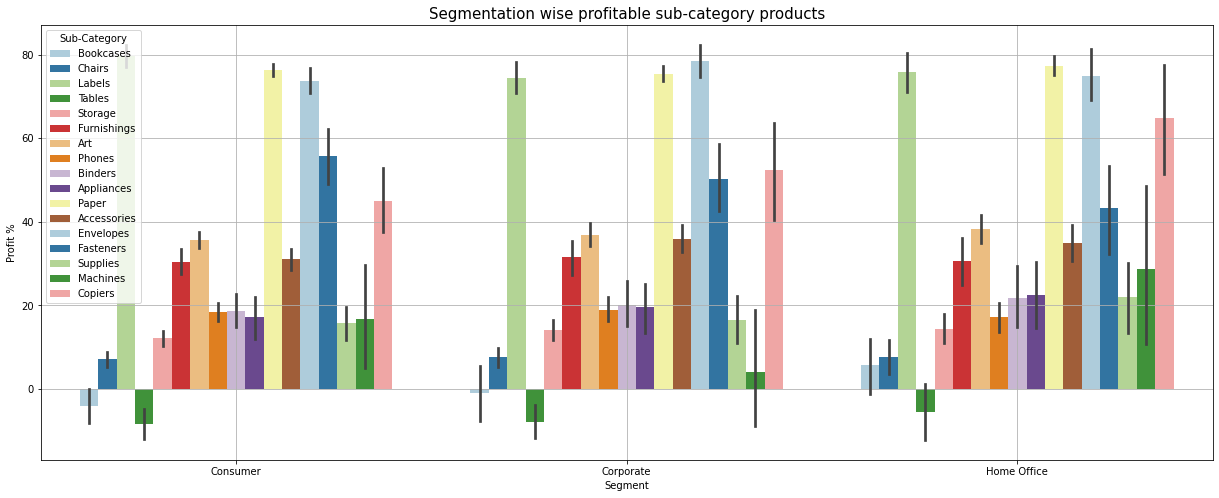

In [25]:
fig = plt.figure(figsize=(21,8))
ax = fig.add_subplot(111)
sns.barplot('Segment', 'Profit %', hue='Sub-Category', palette='Paired',data=df)
for o in ax.patches:
  axes.annotate('{:.0f}'.format(o.get_height()), (o.get_x()+0.15, o.get_height()+1))
plt.title('Segmentation wise profitable sub-category products', fontsize=15)
plt.grid()
plt.show()

**Analysis**: The above graph represnts that superstore makes more profit from labels, paper and envelopes sub-categories in every segment